In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('mutagenicity_kNN.csv')

In [4]:
df=data.copy()
df.head()

,Unnamed: 0,Id,CAS,SMILES,Status,Experimental value,Predicted value,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
0,0,1,100-00-5,O=[N+]([O-])c1ccc(cc1)Cl,Training,1,1,52,0.463602,43.14,38.1064,3.003401,244.429658,157.556,2.2482
1,1,2,100-01-6,O=[N+]([O-])c1ccc(N)cc1,Training,1,1,52,0.359544,69.16,37.5088,3.003401,242.429658,138.126,1.1770
2,2,3,100-02-7,O=[N+]([O-])c1ccc(O)cc1,Training,0,1,52,0.470728,63.37,34.7612,3.003401,241.674771,139.110,1.3004
3,3,4,100-11-8,O=[N+]([O-])c1ccc(cc1)CBr,Training,1,0,58,0.432586,43.14,45.7274,2.913802,257.648013,216.034,2.4897
4,4,5,100-12-9,O=[N+]([O-])c1ccc(cc1)CC,Training,0,0,58,0.479785,43.14,42.4744,2.913802,253.299498,151.165,2.1572


In [5]:
data.shape

(5764, 15)

In [6]:
df.isnull().sum()

Unnamed: 0             0
Id                     0
CAS                    0
SMILES                 0
Status                 0
Experimental value     0
Predicted value        0
NumValenceElectrons    0
qed                    0
TPSA                   0
MolMR                  0
BalabanJ               0
BertzCT                0
MolWt                  0
MolLogP                0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5764 entries, 0 to 5763
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5764 non-null   int64  
 1   Id                   5764 non-null   int64  
 2   CAS                  5764 non-null   object 
 3   SMILES               5764 non-null   object 
 4   Status               5764 non-null   object 
 5   Experimental value   5764 non-null   int64  
 6   Predicted value      5764 non-null   object 
 7   NumValenceElectrons  5764 non-null   int64  
 8   qed                  5764 non-null   float64
 9   TPSA                 5764 non-null   float64
 10  MolMR                5764 non-null   float64
 11  BalabanJ             5764 non-null   float64
 12  BertzCT              5764 non-null   float64
 13  MolWt                5764 non-null   float64
 14  MolLogP              5764 non-null   float64
dtypes: float64(7), int64(4), object(4)
mem

In [8]:
df['Predicted value'].value_counts()

Predicted value
1                3309
0                2449
Non Predicted       6
Name: count, dtype: int64

In [9]:
df=df[df['Predicted value']!='Non Predicted']

In [10]:
df['Predicted value']

0       1
1       1
2       1
3       0
4       0
       ..
5759    0
5760    1
5761    1
5762    1
5763    0
Name: Predicted value, Length: 5758, dtype: object

In [11]:
df['Predicted value'] = df['Predicted value'].astype(int)

In [12]:
df.columns

Index(['Unnamed: 0', 'Id', 'CAS', 'SMILES', 'Status', 'Experimental value',
       'Predicted value', 'NumValenceElectrons', 'qed', 'TPSA', 'MolMR',
       'BalabanJ', 'BertzCT', 'MolWt', 'MolLogP'],
      dtype='object')

In [13]:
df.drop(columns=['Unnamed: 0','Id'],inplace=True)

In [14]:
df.shape

(5758, 13)

In [15]:
df['Status'].value_counts()

Status
Training    5758
Name: count, dtype: int64

As all the values in Status column are same, this is not going to have any effect on our model, so we can remove this column.

In [16]:
df.drop(columns=['Status'],inplace=True)

As CAS is just a unique Registry Number provided to every chemical, we may conclude it won't interfere with the predictions of our model, thereby it can be removed.

In [17]:
df.drop(columns=['CAS'],inplace=True)

In [18]:
df.head()

,SMILES,Experimental value,Predicted value,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
0,O=[N+]([O-])c1ccc(cc1)Cl,1,1,52,0.463602,43.14,38.1064,3.003401,244.429658,157.556,2.2482
1,O=[N+]([O-])c1ccc(N)cc1,1,1,52,0.359544,69.16,37.5088,3.003401,242.429658,138.126,1.1770
2,O=[N+]([O-])c1ccc(O)cc1,0,1,52,0.470728,63.37,34.7612,3.003401,241.674771,139.110,1.3004
3,O=[N+]([O-])c1ccc(cc1)CBr,1,0,58,0.432586,43.14,45.7274,2.913802,257.648013,216.034,2.4897
4,O=[N+]([O-])c1ccc(cc1)CC,0,0,58,0.479785,43.14,42.4744,2.913802,253.299498,151.165,2.1572


In [19]:
df

,SMILES,Experimental value,Predicted value,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
0,O=[N+]([O-])c1ccc(cc1)Cl,1,1,52,0.463602,43.14,38.1064,3.003401,244.429658,157.556,2.24820
1,O=[N+]([O-])c1ccc(N)cc1,1,1,52,0.359544,69.16,37.5088,3.003401,242.429658,138.126,1.17700
2,O=[N+]([O-])c1ccc(O)cc1,0,1,52,0.470728,63.37,34.7612,3.003401,241.674771,139.110,1.30040
3,O=[N+]([O-])c1ccc(cc1)CBr,1,0,58,0.432586,43.14,45.7274,2.913802,257.648013,216.034,2.48970
4,O=[N+]([O-])c1ccc(cc1)CC,0,0,58,0.479785,43.14,42.4744,2.913802,253.299498,151.165,2.15720
...,...,...,...,...,...,...,...,...,...,...,...
5759,O=C1N(C(=O)N(C(=O)N1CC=C)CC2OC2)CC=C,1,0,102,0.485090,78.53,69.3560,2.668492,627.435628,265.269,-1.05750
5760,O=C(C(Br)(Br)Br)Cl,1,1,42,0.495987,17.07,40.3720,3.791118,85.425922,315.186,2.59030
5761,N(CCBr)CCBr,1,1,44,0.568556,12.03,40.4577,2.447473,28.870765,230.931,1.36580
5762,N#Cc2cc(cc(c2(N=Nc1ccc(cc1(NC(=O)C))N(CCOC)CCO...,1,1,184,0.264581,185.59,125.3525,2.552977,1169.342047,485.457,3.84768


In [20]:
df.drop(columns=['SMILES'],inplace=True)

In [21]:
X=df.drop(columns=['Predicted value'])
y=df['Predicted value']
y_t=df['Experimental value']

In [22]:
X

,Experimental value,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
0,1,52,0.463602,43.14,38.1064,3.003401,244.429658,157.556,2.24820
1,1,52,0.359544,69.16,37.5088,3.003401,242.429658,138.126,1.17700
2,0,52,0.470728,63.37,34.7612,3.003401,241.674771,139.110,1.30040
3,1,58,0.432586,43.14,45.7274,2.913802,257.648013,216.034,2.48970
4,0,58,0.479785,43.14,42.4744,2.913802,253.299498,151.165,2.15720
...,...,...,...,...,...,...,...,...,...
5759,1,102,0.485090,78.53,69.3560,2.668492,627.435628,265.269,-1.05750
5760,1,42,0.495987,17.07,40.3720,3.791118,85.425922,315.186,2.59030
5761,1,44,0.568556,12.03,40.4577,2.447473,28.870765,230.931,1.36580
5762,1,184,0.264581,185.59,125.3525,2.552977,1169.342047,485.457,3.84768


In [23]:
df.corr()

,Experimental value,Predicted value,NumValenceElectrons,qed,TPSA,MolMR,BalabanJ,BertzCT,MolWt,MolLogP
Experimental value,1.000000,0.592164,-0.011231,-0.143973,0.065637,0.028256,-0.064214,0.171553,-0.001546,0.057081
Predicted value,0.592164,1.000000,0.004949,-0.125921,0.077032,0.052700,-0.081543,0.213812,0.014917,0.080897
NumValenceElectrons,-0.011231,0.004949,1.000000,-0.200737,0.604191,0.961790,-0.446378,0.805320,0.948927,0.417977
qed,-0.143973,-0.125921,-0.200737,1.000000,-0.216025,-0.188647,-0.063150,-0.209378,-0.194112,-0.083097
TPSA,0.065637,0.077032,0.604191,-0.216025,1.000000,0.440383,-0.072740,0.449473,0.558071,-0.282042
MolMR,0.028256,0.052700,0.961790,-0.188647,0.440383,1.000000,-0.514867,0.865258,0.935005,0.595593
BalabanJ,-0.064214,-0.081543,-0.446378,-0.063150,-0.072740,-0.514867,1.000000,-0.559712,-0.382986,-0.334971
BertzCT,0.171553,0.213812,0.805320,-0.209378,0.449473,0.865258,-0.559712,1.000000,0.778555,0.534236
MolWt,-0.001546,0.014917,0.948927,-0.194112,0.558071,0.935005,-0.382986,0.778555,1.000000,0.459762
MolLogP,0.057081,0.080897,0.417977,-0.083097,-0.282042,0.595593,-0.334971,0.534236,0.459762,1.000000


As MolMR and MotWt are highly correlated, we may remove MolMR

In [24]:
df.drop(columns=['NumValenceElectrons','MolMR'],inplace=True)

C:\ProgramData\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

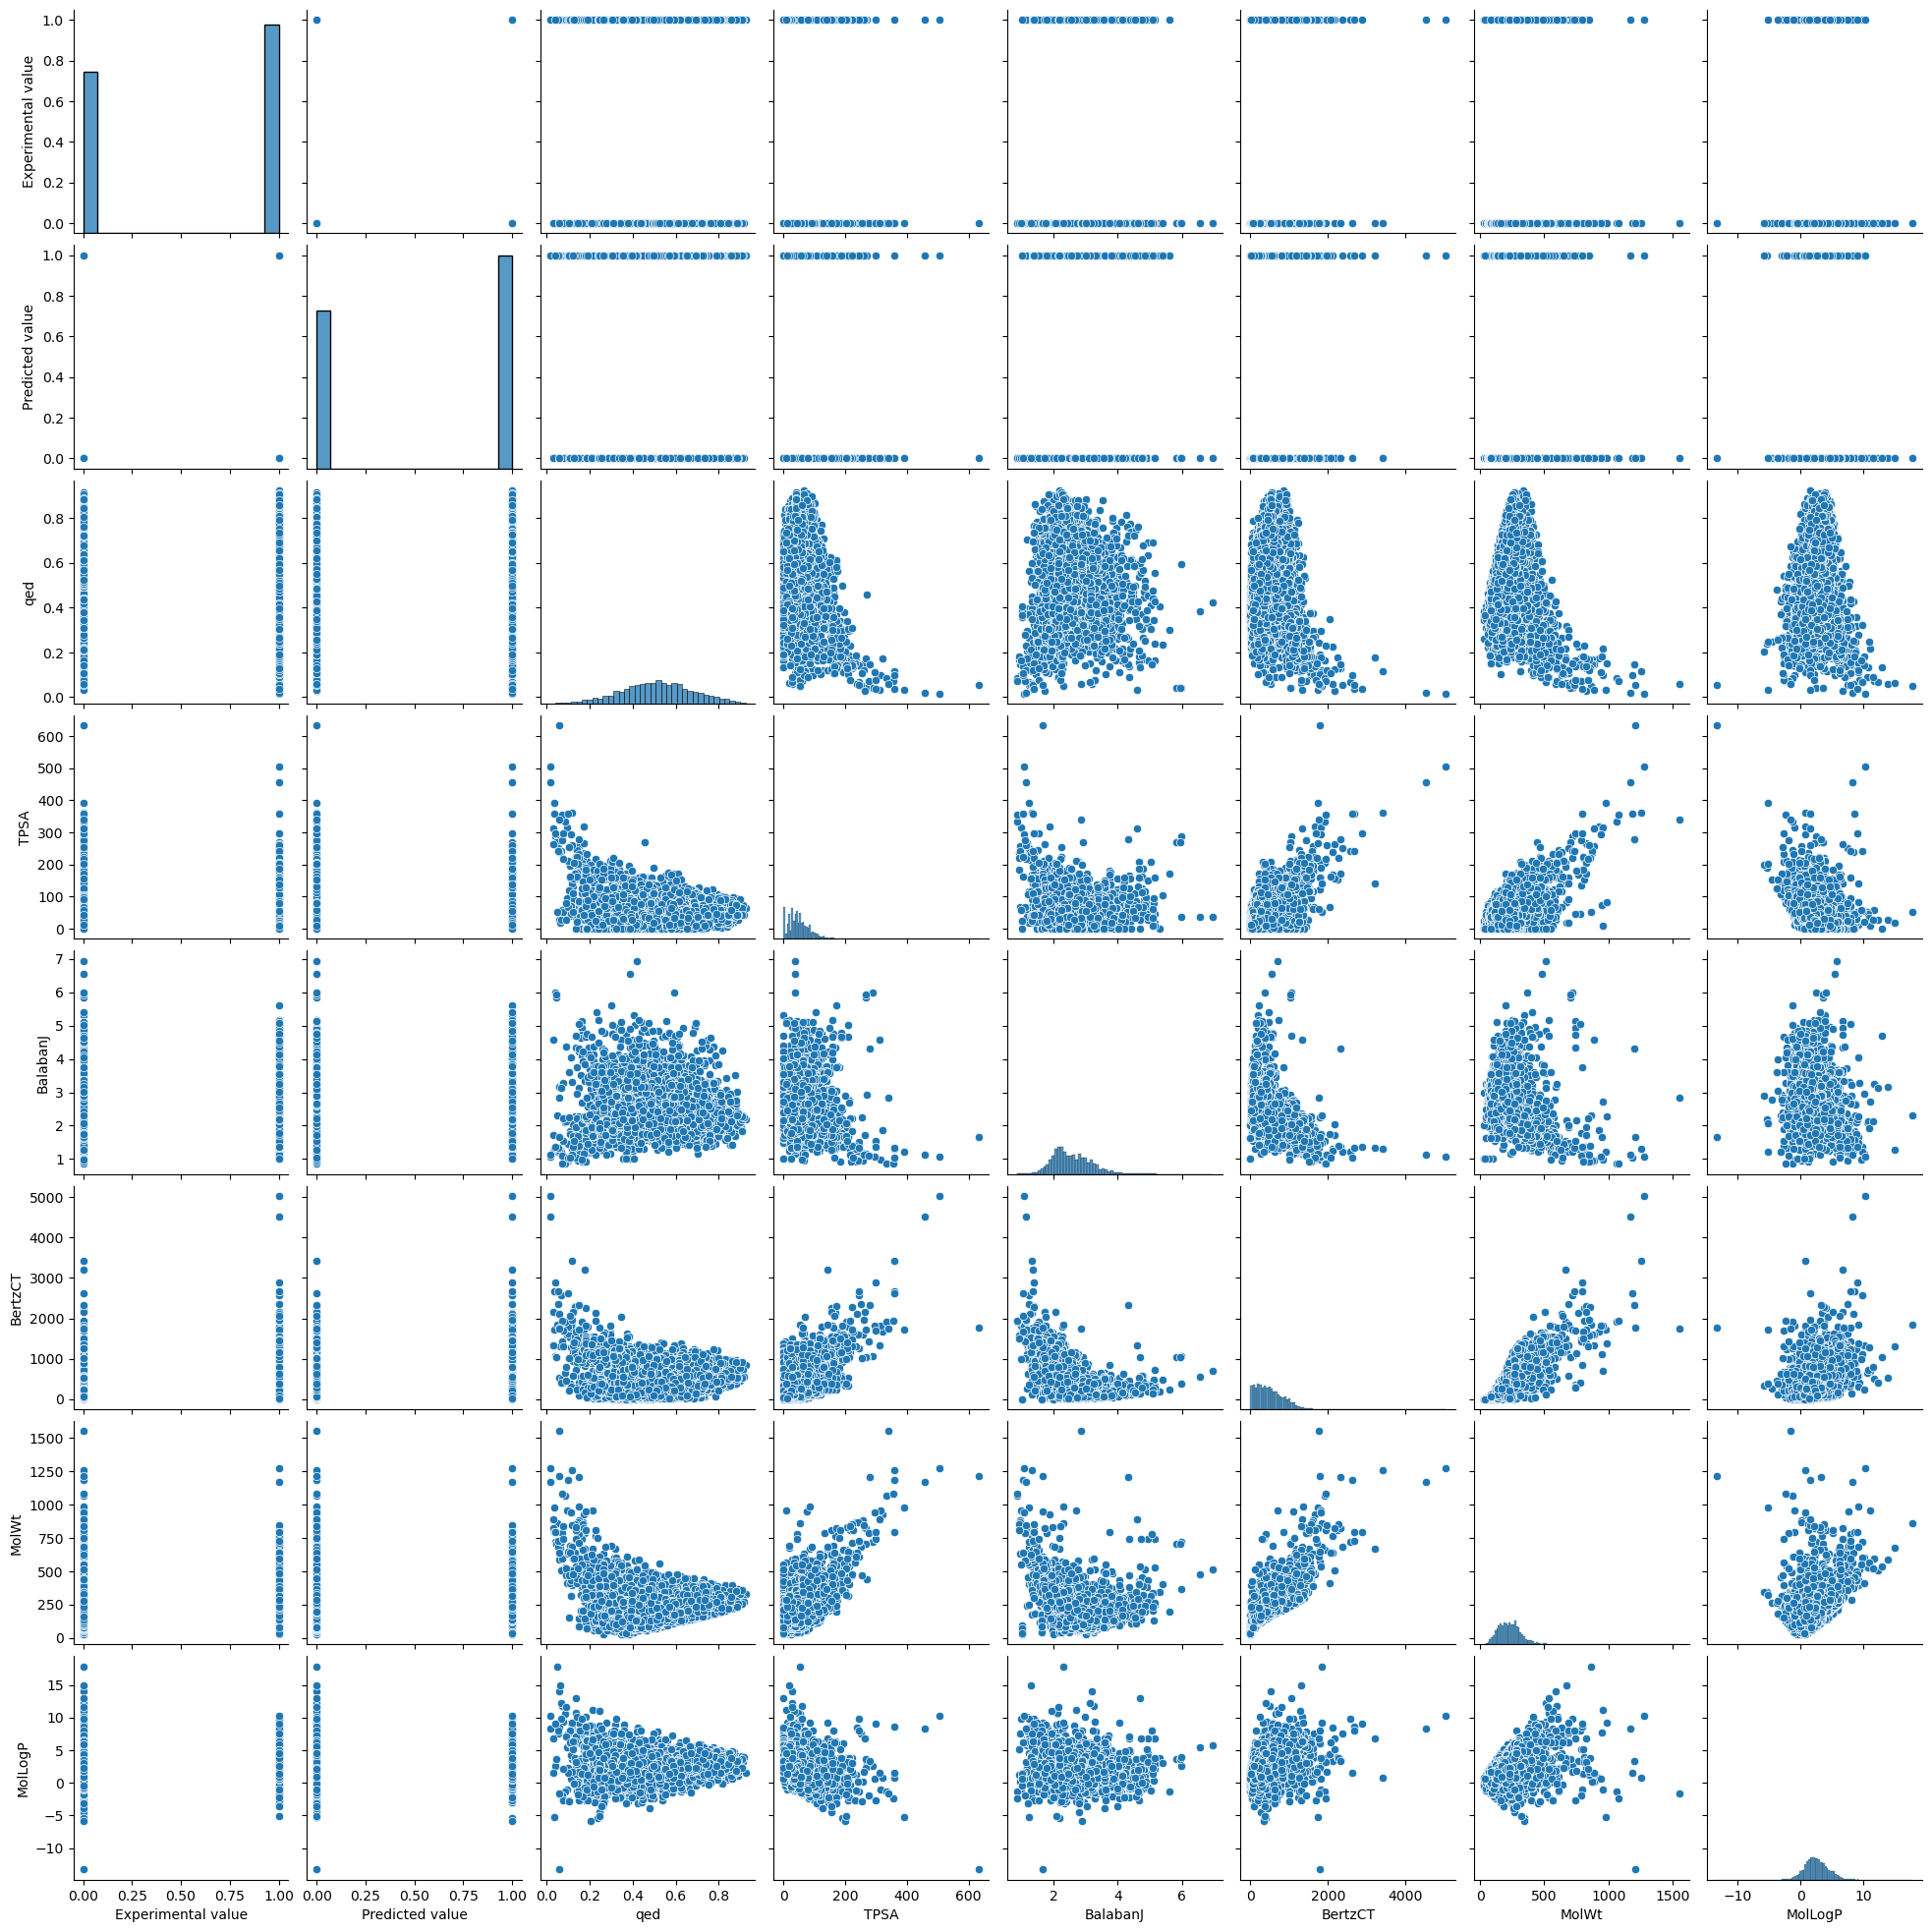

In [25]:
sns.pairplot(df)
plt.show()

In [26]:
y.value_counts()

Predicted value
1    3309
0    2449
Name: count, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.3,random_state=42)

In [28]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
X_train_resampled=ros.fit(X_train,y_train)

In [29]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train,y_train)
X_test=scaler.transform(X_test)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)

In [31]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [32]:
y_pred=model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,roc_curve
accuracy_score(y_pred=y_pred,y_true=y_test)

0.8026620370370371

In [34]:
f1_score(y_pred=y_pred,y_true=y_test)

0.8299251870324189

In [35]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X,y)
y_pred1=model.predict(X)
f1_score(y_pred=y_pred1,y_true=y_t)

0.7622901678657074

In [36]:
recall_score(y_pred=y_pred,y_true=y_test)

0.8387096774193549

In [37]:
precision_score(y_pred=y_pred,y_true=y_test)

0.8213228035538006

In [38]:
roc_curve(y_test,y_pred)

(array([0.        , 0.24592391, 1.        ]),
 array([0.        , 0.83870968, 1.        ]),
 array([2, 1, 0]))

In [39]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test,y_pred)

In [40]:
cf

array([[555, 181],
       [160, 832]], dtype=int64)

In [71]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': np.arange(1, 30, 2),  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan', 'minkowski'] 
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print("Best K:", grid_search.best_params_)

Best K: {'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'distance'}


In [74]:
model=KNeighborsClassifier(n_neighbors=29)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
f1_score(y_pred=y_pred,y_true=y_test)

0.8392857142857143

In [75]:
recall_score(y_pred=y_pred,y_true=y_test)

0.8528225806451613

In [76]:
precision_score(y_pred=y_pred,y_true=y_test)

0.826171875

In [77]:
X=df.drop(columns=['Predicted value','Experimental value'])
y=df['Predicted value']
y_t=df['Experimental value']
model.fit(X,y)
y_pred2=model.predict(X)


0.7241833894829354

In [86]:
f1=f1_score(y_pred=y_pred2,y_true=y_t)
precision=precision_score(y_pred=y_pred2,y_true=y_t)
accuracy=accuracy_score(y_pred=y_pred2,y_true=y_t)
recall=recall_score(y_pred=y_pred2,y_true=y_t)

In [87]:
print(f"Model's f1 score with respect to experimental data={f1}")
print(f"Model's precision score with respect to experimental data={precision}")
print(f"Model's recall score with respect to experimental data={recall}")
print(f"Model's accuracy score with respect to experimental data={accuracy}")

Model's f1 score with respect to experimental data=0.7241833894829354
Model's precision score with respect to experimental data=0.6908887646730016
Model's recall score with respect to experimental data=0.7608494921514312
Model's accuracy score with respect to experimental data=0.6729767280305662


In [46]:

from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_neighbors': np.arange(1, 30, 1),  # Search neighbors from 1 to 30
    'weights': ['uniform', 'distance'],  # Use either uniform or distance weighting
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Different distance metrics
}
knn = KNeighborsClassifier()

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    knn, param_distributions=param_dist, 
    n_iter=20,  # Number of random combinations to try
    cv=5,       # 5-fold cross-validation
    scoring='f1', 
    random_state=42, 
    n_jobs=-1  # Use all available CPU cores
)

# Fit the model
random_search.fit(X_train, y_train)

# Print best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best f1: {random_search.best_score_:.4f}")

# Evaluate on test set
best_knn = random_search.best_estimator_
test_accuracy = best_knn.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy:.4f}")


Best Parameters: {'weights': 'distance', 'n_neighbors': 28, 'metric': 'manhattan'}
Best f1: 0.8408
Test Set Accuracy: 0.8281


In [65]:
best_knn.fit(X_train,y_train)
y_pred=best_knn.predict(X_test)
f1_score(y_pred=y_pred,y_true=y_test)

0.8531883341571922

In [66]:
precision_score(y_pred=y_pred,y_true=y_test)

0.8370514064015518

In [68]:
recall_score(y_pred=y_pred,y_true=y_test)

0.8699596774193549

In [69]:
accuracy_score(y_pred=y_pred,y_true=y_test)

0.828125

In [57]:
#Final Model scores with actual experimental data
X=df.drop(columns=['Predicted value','Experimental value'])
y=df['Predicted value']
y_t=df['Experimental value']
best_knn.fit(X,y)
y_pred1=best_knn.predict(X)
f1=f1_score(y_pred=y_pred1,y_true=y_t)

In [58]:
precision=precision_score(y_pred=y_pred1,y_true=y_t)

In [59]:
accuracy=accuracy_score(y_pred=y_pred1,y_true=y_t)

In [62]:
recall=recall_score(y_pred=y_pred1,y_true=y_t)

In [63]:
print(f"Final Model's f1 score with respect to experimental data={f1}")
print(f"Final Model's precision score with respect to experimental data={precision}")
print(f"Final Model's recall score with respect to experimental data={recall}")
print(f"Final Model's accuracy score with respect to experimental data={accuracy}")

Final Model's f1 score with respect to experimental data=0.8249656645811079
Final Model's precision score with respect to experimental data=0.8180992736077481
Final Model's recall score with respect to experimental data=0.8319482917820868
Final Model's accuracy score with respect to experimental data=0.8007988885029524
